In [1]:
# Importing all required libraries

import pandas as pd
import numpy as np                  # For mathematical calculations
import matplotlib.pyplot as plt     # For plotting graphs
from datetime import datetime       # To access datetime
from pandas import Series           # To work on Series
%matplotlib inline
import warnings                     # To ignore the warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the train datasets
# Loading the dataset

from google.colab import files
uploaded = files.upload()

Saving Train_SU63ISt.csv to Train_SU63ISt.csv


In [3]:
# Storing the Dataset in a Pandas Dataframe
import io
train = pd.read_csv(io.BytesIO(uploaded['Train_SU63ISt.csv']))

In [4]:
# Importing the test datasets
# Loading the dataset

from google.colab import files
uploaded = files.upload()

Saving Test_0qrQsBZ.csv to Test_0qrQsBZ.csv


In [5]:
# Storing the Dataset in a Pandas Dataframe
import io
test = pd.read_csv(io.BytesIO(uploaded['Test_0qrQsBZ.csv']))

In [6]:
# Creating copies of the datasets
# This is to avoid making any change to original datasets

train_original = train.copy()
test_original = test.copy()

In [7]:
# Viewing the features in the datasets
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

**Observation:**

*   The train dataset has ID, Datetime and corresponding count of passengers.
*   Test file has only ID and Datetime only. 
*   Task is to now predict the Count for the test file.

In [8]:
# Viewing the first few rows of the train dataset
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [9]:
# Viewing the first few rows of the test dataset
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [10]:
# Checking for the data types for each feature

train.dtypes, test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

**Observation:**
*   ID and Count are in integer format  while Datetime is in object format for the train file.
*   ID is in integer and Datetime is in object format for the test file. 

In [11]:
# Checking the shape (size) of the dataset
train.shape, test.shape

((18288, 3), (5112, 2))

**Observation:**
*   Train dataset has 18,288 records and 3 features.
*   Test dataset has 5112 records and 2 features.

In [12]:
# Feature Extraction
# Time and Date need to be extracted from the Datetime
# Datetime was in object data type format. 
# This is first converted to datetime formatto be able to extraxt the date and time

train['Datetime'] = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format = '%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime, format = '%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime, format = '%d-%m-%Y %H:%M')


In [13]:
# Extracting the year, month, day and hour

for i in (train, test, train_original, test_original):
  i['year'] = i.Datetime.dt.year
  i['month'] = i.Datetime.dt.month
  i['day'] = i.Datetime.dt.day
  i['Hour'] = i.Datetime.dt.hour

In [14]:
# Creating a new variable called "weekend"
# Purpose for this is to visualize impact of weekend traffic

# First, extraction of day of week from Datetime variable
# Second, based on the values of the day, we assign whether the day is a weekend or not
# 5 and 6 shall represent weekends

train['day_of_week'] = train['Datetime'].dt.dayofweek

temp = train['Datetime']

In [15]:
# Assigning 1 if the day of week is a weekend and 0 if weekday

def applyer(row):
  if row.dayofweek == 5 or row.dayofweek == 6:
    return 1
  else:
    return 0

temp2 = train['Datetime'].apply(applyer)
train['weekend'] = temp2

In [16]:
# Concatinating the year and month to the dataset

train['year'] = train['Datetime'].dt.year
train['month'] = train['Datetime'].dt.month
temp = train['Datetime']

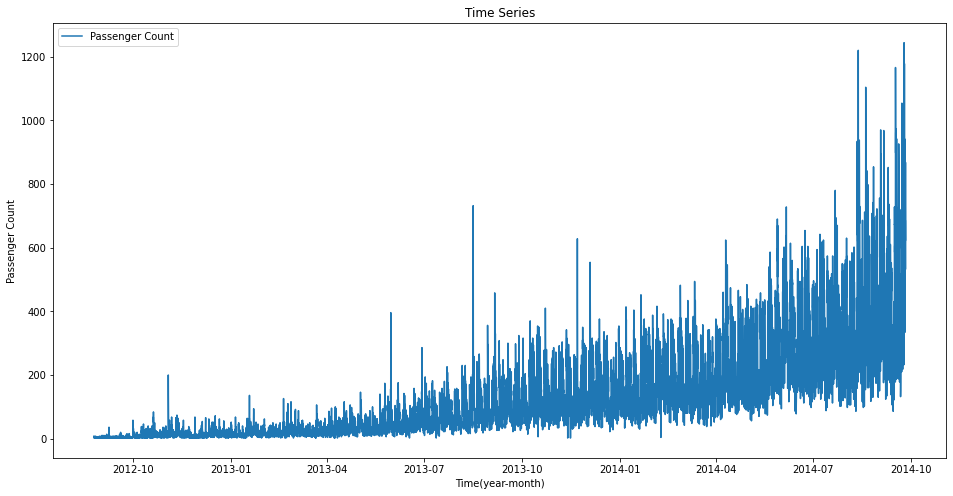

In [17]:
# Visualizing the time series

train.index = train['Datetime']     # indexing the Datetime to get the time period on the x-axis
df = train.drop('ID',1)             # drop ID variable to get only the Datetime on x-axis
ts = df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts, label='Passenger Count')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger Count")
plt.legend(loc='best')

**Observation:**

*   There's an increasing trend in the series (i.e., no. of count is increasing with respect to time).
*   At certain points, there's a sudden increase in the number of counts (Perhaps because on particular days, due to some event, the traffic was high).


**EDA**

*Hypothesis the project is working with*

*   Traffic will increase as the years pass by.
*   Traffic will be high from May to October.
*   Traffic on Wednesdays will be more.
*   Traffic during the peak hours will be high

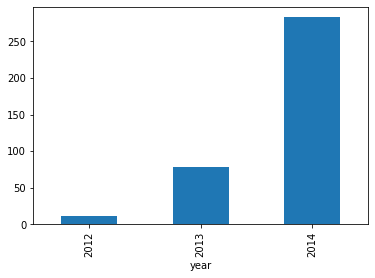

In [18]:
# checking the yearly passenger count

train.groupby('year')['Count'].mean().plot.bar()

**Observation**

*   There's an exponetial growth in traffic with respect to year (this validates one of the hypothesis). 

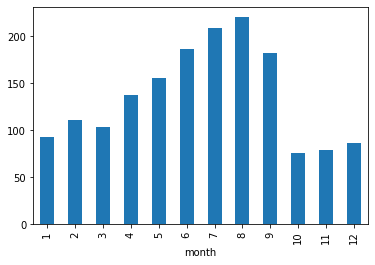

In [19]:
# Checking for 2nd hypothesis: increase in traffic from May to October

train.groupby('month')['Count'].mean().plot.bar()

**Observation:**
*   There is a decrease in the mean of passenger count in the last 3 months. This doesnt look right.

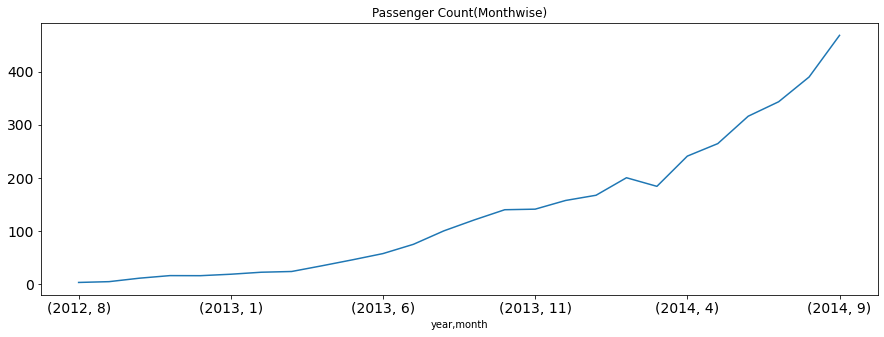

In [20]:
# Checking why the last 3 months experience a decrease in the no. of passengers
# We look at the monthly mean of each year separately

temp = train.groupby(['year', 'month'])['Count'].mean()
temp.plot(figsize=(15,5), title = 'Passenger Count(Monthwise)', fontsize = 14)

**Observation:**
*   The last 3 months (10,11 and 12) aren't present for the year 2014 & the mean value for these months in 2012 is so low.
*   Given that there's an increasing trend in the time series, the mean value for the rest of the months will be more because of their larger passenger counts in the year 2014.
*   There is also an increasing trend in monthly passenger count and the growth is approximately exponential.

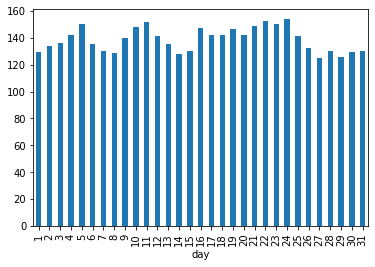

In [21]:
# Checking the daily mean of passenger count

train.groupby('day')['Count'].mean().plot.bar()

**Observation:**
*   Daily mean of passenger count does not give us much insight that we'd desire

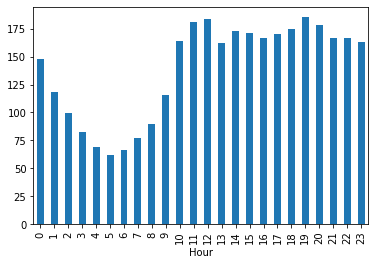

In [22]:
# Checking the mean of hourly passenger count
# This checks on the hypothesison whether the traffic will be more during peak hours

train.groupby('Hour')['Count'].mean().plot.bar()

**Observation:**
*   Peak traffic is at 7 pm, afterwhich the trend reduces to about 5 am. 
*   Passenger count then starts increasing from 5 am & peaks even more between  am to 12 noon. 

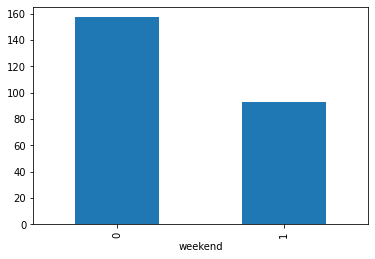

In [23]:
# Checking on traffic on weekdays vs the weekend
# This is to validate the hypothesis that traffic will be more on weekdays

train.groupby('weekend')['Count'].mean().plot.bar()

**Observation:**
*   Traffic is definitely more on weekdays than the weekends.

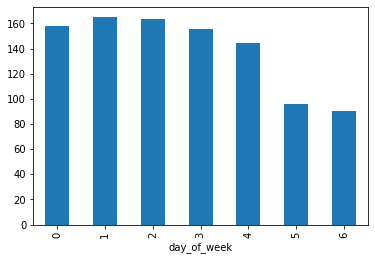

In [24]:
# Checking on the day wise passenger count
# 0 represents start of week (Monday), 6 represents end of week (Sunday)

train.groupby('day_of_week')['Count'].mean().plot.bar()

**Observation:**
Passenger count is less on the weekends than the weekdays 

**Modeling**

In [25]:
# Dropping the ID variable as it is of no use
train = train.drop('ID', 1)

In [26]:
# Aggregating the hourly time series to daily, weekly & monthly time series for train data
# This reduces the noise in the hourly time series and makes it more stable 

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index = train.Timestamp

# Hourly time series
hourly = train.resample('H').mean()

# Converting to daily mean
daily = train.resample('D').mean()

# Converting to weekly mean
weekly = train.resample('W').mean()

# Converting to monthly mean
monthly = train.resample('M').mean()

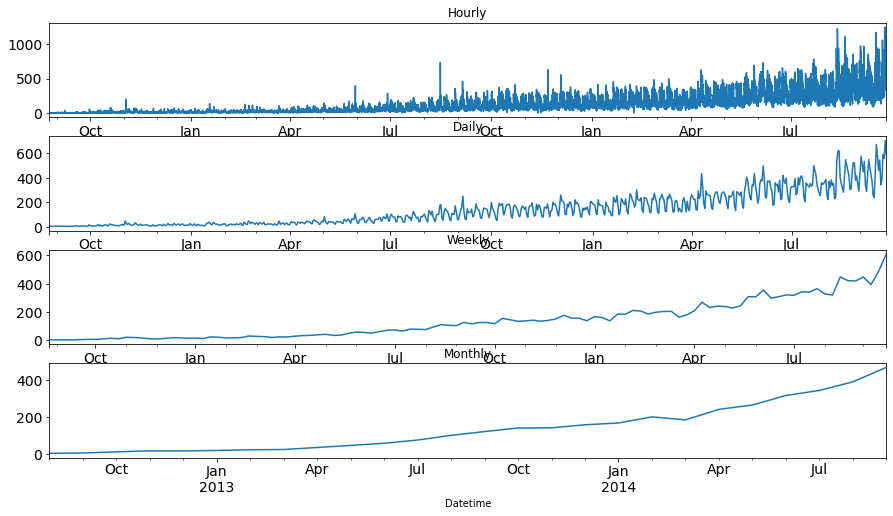

In [27]:
# Visualizing the hourly, daily and monthly time series

fig, axs = plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8), title = 'Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title = 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title = 'Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,8), title = 'Monthly', fontsize=14, ax=axs[3])

plt.show()


**Observation:**
*   Time series is seen to be getting more stable when aggregated on a daily, weekly & monthly basis

In [28]:
# Working on the daily time series given that it would be difficult to convert monthly & weekly predictions to hourly predictions 

test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
test.index = test.Timestamp

# Conversion to Daily mean
test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index = train.Timestamp

# Conversion to Daily mean
train = train.resample('D').mean()


In [29]:
# Splitting the data into training and Validation datasets
# last 3 months are taken as the validation data as the trend will be most in them.
# more than 3 months of validation set makes the training set have less data points as total duration is 25 months
# start date is 25-08-2012, end date is 25-09-2014

Train = train.loc['2012-08-25':'2014-06-24']
valid = train.loc['2014-06-25':'2014-09-25']

**Observation**
*   Time based vaidation is done by selectig the last 3 months for validation dataset. Doing it randomly would have worked well for the train dataset but wont work effectively for the validation dataset.
*   Why? Splitting randomly would take some values from the starting and some from the last years as well. 
*   This kind of split is used in working with time related problems. 

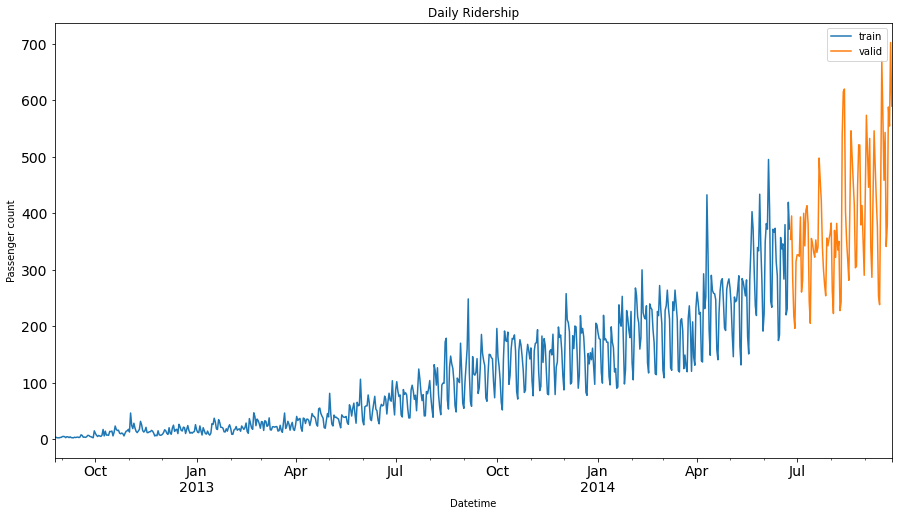

In [30]:
# Looking at how the train and validation part has been divided

Train.Count.plot(figsize=(15,8), title='Daily Ridership', fontsize=14, label='train')
valid.Count.plot(figsize=(15,8), title='Daily Ridership', fontsize=14, label='valid')
plt.xlabel("Datetime") 
plt.ylabel("Passenger count")
plt.legend(loc='best')
plt.show()

**Observation:**
*   Blue part reps the train data whereas the orange section reps the validation data.


**Modeling Techniques**

Various Methods to be used to forecast time series using different models:
*   Naive approach 


> This forecasting technique assumes that the next expected point is equal to the last observed point. Thus, we can expect a straight horizontal line as the prediction. 

*   Moving Average


> Predictions here are made on the basis of the avaerage of last few points instead of taking all the previously known values.

*   Simple Exponential Smoothing


> This technique assign larger weights to more recent observations than to observations from the distant past. The weightss decrease exponentially as observations come from further in the past. The smallest weights are associated with the oldest observations.


*   Holt's Linear trend Model


> This technique is an extension of simple exponential smoothing to allow forecasting of data with a trend. It takes into account the trend of the dataset. The forecast function in ths method is a function of level and trend.

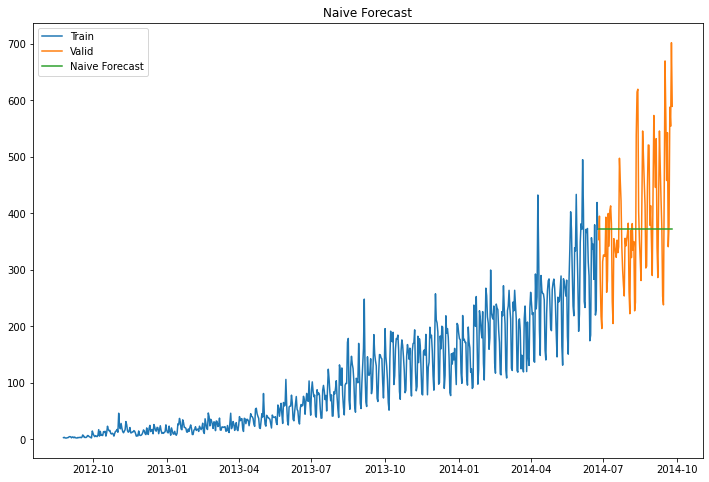

In [31]:
# 1. Naive Approach
# Making predictions using naive approach for the validation set

dd = np.asarray(Train.Count)
y_hat = valid.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(Train.index, Train['Count'], label='Train')
plt.plot(valid.index, valid['Count'], label='Valid')
plt.plot(y_hat.index, y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [32]:
# Calculating RMSE (Root Mean Square Error) to check for accuracy of the model on validation dataset
# RMSE is the standard deviation of the residual
# residuals are a measure of how far from the regression line data points are

from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive))
print(rms)

111.79050467496724


**Observation**
This method is not suitable for datasets with high variability as the rmse is high

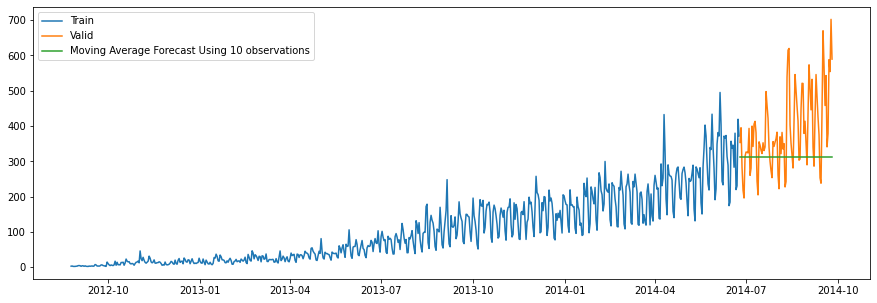

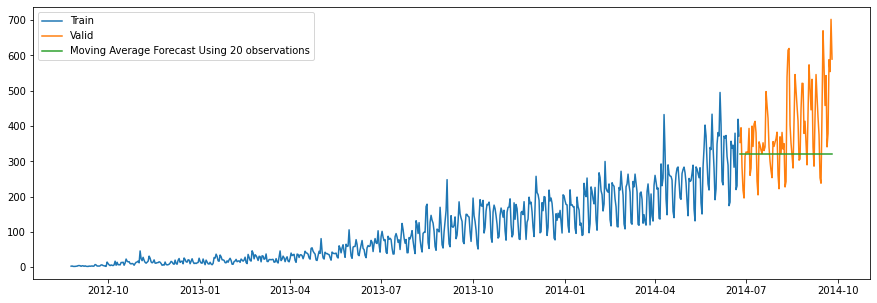

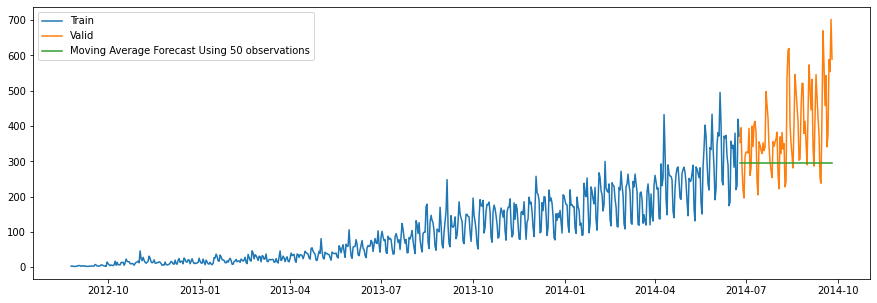

In [33]:
# 2. Moving Average
# We take the average of the passenger counts for last few time periods only.
# We take the rolling mean for the last 10,20 and 50 days and visualize the results

# 10 Observations
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations
plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast Using 10 observations')
plt.legend(loc='best')
plt.show()

# 20 Observations
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1] # average of last 20 observations
plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast Using 20 observations')
plt.legend(loc='best')
plt.show()

# 50 Observations
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1] # average of last 50 observations
plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast Using 50 observations')
plt.legend(loc='best')
plt.show()


**Observation:**
*   Predictions are getting weaker as the number of observations are increased.


In [34]:
# Calculating RMSE (Root Mean Square Error) to check for accuracy of the model on validation dataset
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast))
print(rms)

144.19175679986802


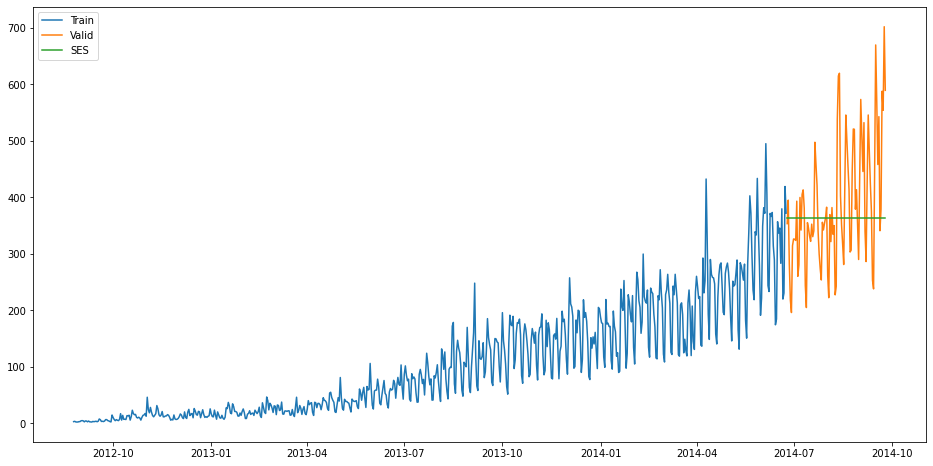

In [35]:
# 3. Simple Exponential Smoothing
# We assign larger weights to more recent observations than to those from the distant past.
# NB: This method is similar to naive's approach if we give the entire weight to the last observed value only.

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [36]:
# Calculating the rmse
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SES))
print(rms)

113.43708111884514


**Observation:**
* The fit of the model has improved as the rmse has reduced.

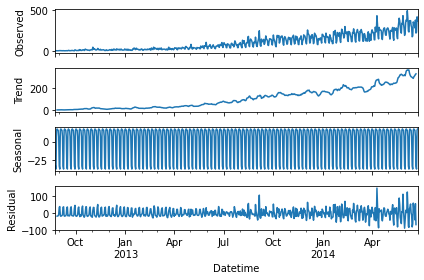

In [37]:
# 4. Holt's linear Trend Model
# This model is an extension of simple exponential smoothing to allow forecasting of data with a trend
# It takes into account the trend of the dataset.
# The forecast function here is a function of level and trend

# We first visualize the trend, seasonality and error in the series
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

**Observation:**
* An increasing trend can be seen in the dataset.

**The timeseries can be docomposed into 4 parts:**


1.   Observed: the original time series.
2.   Trend: shows the trend in the time series, i.e., increasing/decreasing behaviour.
3.   Seasonal: tells us about the seasonalityin the time series.
4.   Residual: obtained by removing any trend or seasonality in the time series.



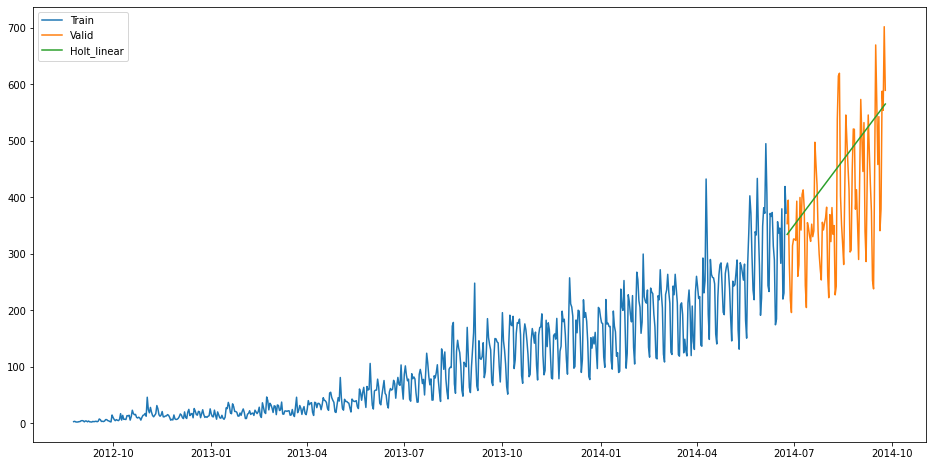

In [38]:
# Visualizing Holt's linear Trend Model
y_hat_avg = valid.copy()
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level=0.3, smoothing_slope = 0.1) 
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

**Observation:**
*   An inclined line is seen suggesting that the model hs taken into consideration the trend of the time series.

In [39]:
# Calculating the rmse 
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear))
print(rms)

112.94278345314041


**Observation:**
* The rmse value has reduced

**Predicting the passenger count for the test dataset using various models**

In [40]:
# Holt's Linear Trend Model on daily Time Series
# Making predictions on the test dataset
# Predictions will be based on the daily time series then we'll distribute the daily prediction to hourly prediction.
# The holt's linear trend model has been fitted on the train dataset & validated  using the validation dataset

# We load the submission file
# Importing the train datasets
# Loading the dataset

from google.colab import files
uploaded = files.upload()

Saving submission.csv to submission.csv


In [41]:
# Storing the Dataset in a Pandas Dataframe
import io
submission = pd.read_csv(io.BytesIO(uploaded['submission.csv']))

In [42]:
# Making predictions 
predict=fit1.forecast(len(test))

**Note:** These are the daily predictions

In [43]:
# Saving the predictions in test file in a new column
test['prediction']=predict

In [44]:
# Predictions above are on a daily basis
# Predictions have to be converted to hourly basis
# We first calculate the ratio of passenger count for each hour of every day

# Calculating the hourly ratio of count
train_original['ratio']=train_original['Count']/train_original['Count'].sum()

In [45]:
# Grouping the hourly ratio
# To calculate the hourly predictions we multiply the daily prediction with the hourly ratio
temp=train_original.groupby(['Hour'])['ratio'].sum()

In [46]:
# Groupby to csv format
from google.colab import files
pd.DataFrame(temp, columns=['Hour', 'ratio']).to_csv('GROUPby.csv')


In [47]:
temp2=pd.read_csv("GROUPby.csv")
temp2=temp2.drop('Hour.1',1)

In [48]:
# Merging test and test_original datasets on day, month and year
merge = pd.merge(test,test_original, on=('day','month','year'), how='left')
merge['Hour']=merge['Hour_y']
merge=merge.drop(['year', 'month', 'Datetime', 'Hour_x','Hour_y'], axis=1)

# Predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='Hour', how='left')

# Converting the ratio to the original scale
prediction['Count']=prediction['prediction']*prediction['ratio']*24
prediction['ID']=prediction['ID_y']



In [49]:
# Dropping all other features from submission file and only keep ID and Count
submission=prediction.drop(['ID_x', 'day', 'ID_y','prediction','Hour','ratio'], axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID', 'Count']).to_csv('Holt_linear.csv')

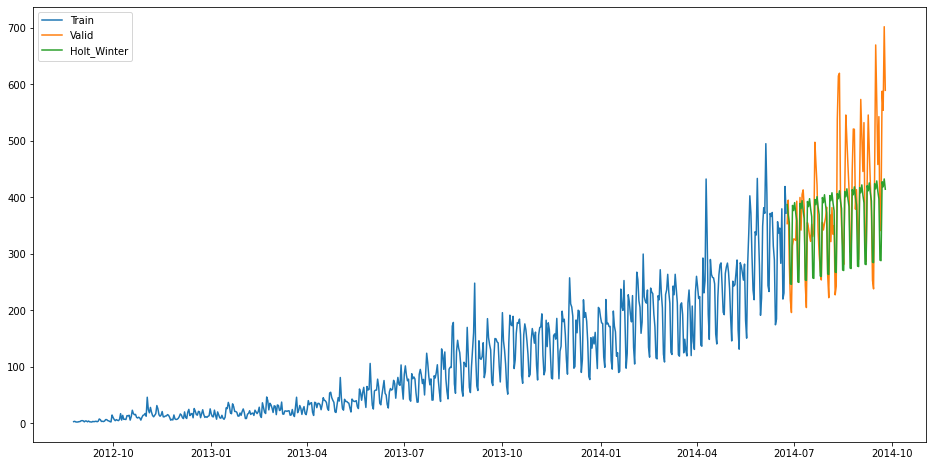

In [50]:
# Looking at how well the Holt winters model predicts the passenger count for test dataset
# Holt winter's model is used coz it takes into account both trend and seasonalityto forecast future prices.
# Other models dont take into account the seasonality of the dataset while forecasting.
# NB: Datasets showing similar sets of pattern after fixed intervals of a time of period suffer from seasonality

# Fitting the model on training dataset and validating using validation dataset
y_hat_avg=valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['Count']), seasonal_periods=7, trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [51]:
# Calculating rmse
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_Winter))
print(rms)

82.37571191747172


**Observation:**
rmse value has drastically reduced using this method. 

In [52]:
# Forecasting the counts for the entire length of the Test Dataset
predict=fit1.forecast(len(test))

In [53]:
# Converting daily passenger count into hourly passenger count
test['prediction']=predict

# Merge Test and test_original on day, month and year
merge = pd.merge(test,test_original, on=('day','month','year'), how='left')
merge['Hour']=merge['Hour_y']
merge=merge.drop(['year', 'month', 'Datetime', 'Hour_x','Hour_y'], axis=1)

# Predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='Hour', how='left')

# Converting the ratio to the original scale
prediction['Count']=prediction['prediction']*prediction['ratio']*24
prediction['ID']=prediction['ID_y']

In [54]:
# Dropping all features other than ID and Count
prediction['ID']=prediction['ID_y']
submission=prediction.drop(['ID_x', 'day', 'ID_y','prediction','Hour','ratio'], axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID', 'Count']).to_csv('Holt_Winter.csv')

**ARIMA MODEL**
ARIMA model is specified by 3 ordered parameters:
*   P: the order of the autoregressive model (number of time lags).
*   d: Degree of differencing (number of times the data have had past values subtracted).
*   q: the order of moving average model

**Stationary Time Series**
For a series to be classified as stationary time series:
*   The mean of the time series should not be a function of time. It should be constant.
*   The variance of the time series should not be a function of time.
*   The covariance of the i-th term aadn the (i+m)th term should not be a function of time.  

**Stationarity Check**
* Dickey Fuller test is used to check the stationarity of the series.
* The intuition behind this test is that it determines how strongly a time series is defined by a trend.
* Null hypothesis of the test: time series is not stationary (has some time-dependent structure).
* The alternate hypothesis/rejecting the null hypothesis: the time series is stationary. 
*   Time series is made stationary to make the variables independent
*   To make the time series stationary, we need to remove the trend and seasonality from the data.
* Test results comprise of **Test Statistics** and some **Critical value**
* If Test statistics < Critical values, We reject the null hypothesis (stationary).
* If Test statistics > Critical Values, we accept the null hyppothesis (non-stationarity).

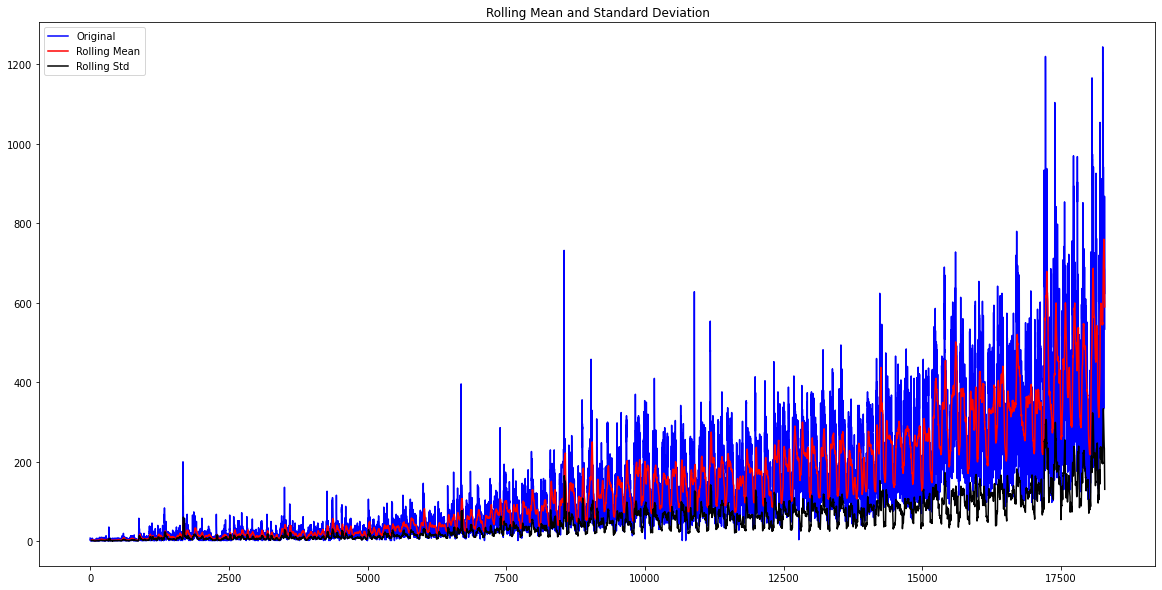

Results of Dickey-Fuller Test:
Test Statistic                    -4.456561
p value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [63]:
# ARIMA forecasting for a stationary time series is nothing but a linear eaquation (like linear regression)

# Function to calculate the results of Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(train_original):
    # Determining rolling statistics
  rolmean = train_original.rolling(24).mean() # 24 hours on each day
  rolstd = train_original.rolling(24).std()
    # Plot rolling statistics
  orig = plt.plot(train_original, color='blue', label='Original')
  mean = plt.plot(rolmean, color='red', label='Rolling Mean')
  std = plt.plot(rolstd, color='black', label='Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean and Standard Deviation')
  plt.show(block=False)
    #Perform Dickey-Fuller Test:
  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(train_original, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p value', '#Lags Used', 'Number of Observations Used'])
  
  for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)
  from matplotlib.pylab import rcParams
  rcParams['figure.figsize'] = 20,10

test_stationarity(train_original['Count'])


**Observation:**
* Test Statistics < Critical Value, thus, we reject null hypothesis. The time series is **stationary.**

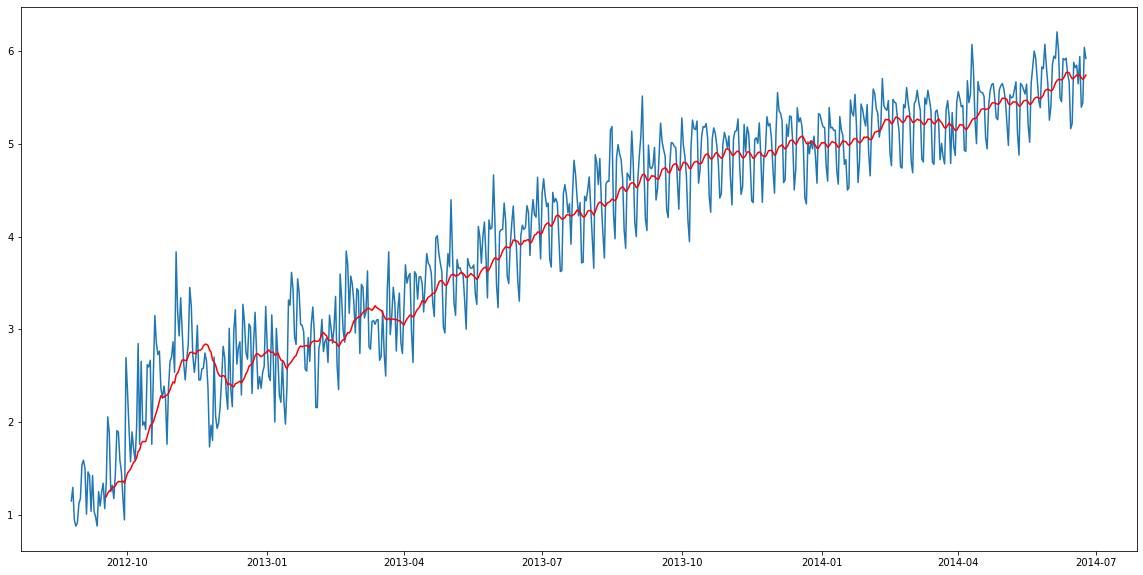

In [64]:
# Removing the trend and seasonality to make the data more stationary
# Trend exists when there's a long-term increase/decrease in data (Doesnt have to be linear)
# There's and increasing trend in data.
# We apply log transformation that penalizes higher values more than smaller ones.
# We take rolling average to remove the trend
# We also take the wndow size of 24 based on the 24 hours in a day.

Train_log = np.log(Train['Count'])
valid_log = np.log(valid['Count'])

moving_avg = Train_log.rolling(24).mean()
plt.plot (Train_log)
plt.plot(moving_avg, color='red')
plt.show()

**Observation**
An increasing trend is observed

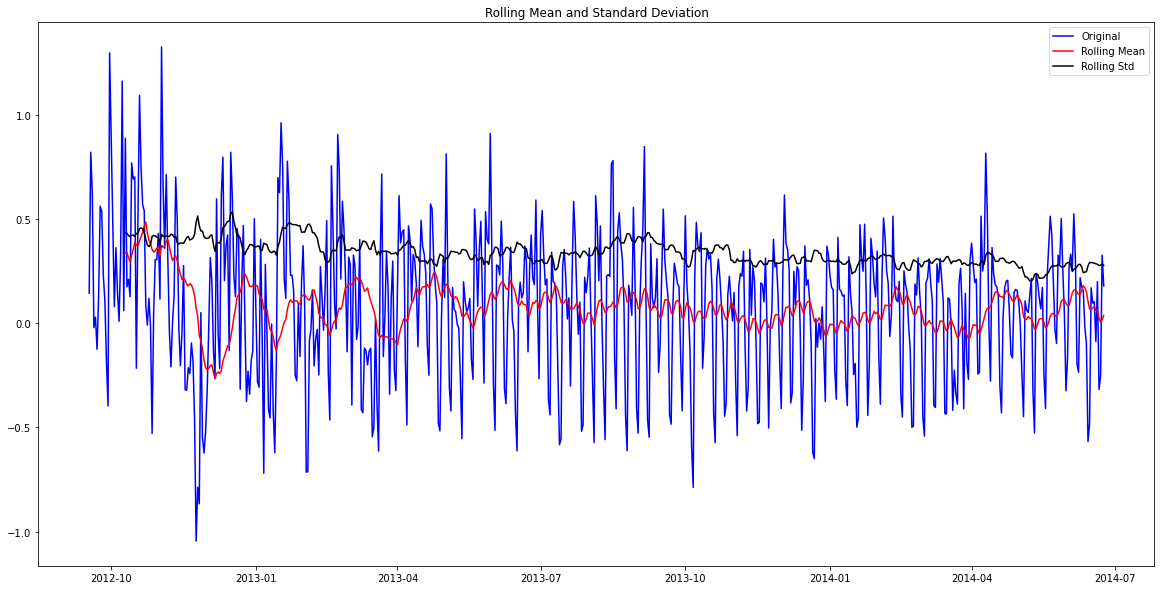

Results of Dickey-Fuller Test:
Test Statistic                -5.861646e+00
p value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [65]:
# Removing increasing trend to make our time series stationary
# train_log_moving_avg_diff is calculated to understand how the series looks after log transformation and differencing. 
# The second element Train_log.shift(1) will shift the series by one value. 
# So when the difference  Train_log - Train_log.shift(1) is calculated, it is essentially level one differencing.

train_log_moving_avg_diff = Train_log - moving_avg

# Dropping null values obtained after taking the average of 24 values. This made the mean not to be defined for the first 23 values
train_log_moving_avg_diff.dropna(inplace = True)
test_stationarity(train_log_moving_avg_diff)

**Observation:**
* Test statistic is very small vis-a-vis the Critical value. This tells us that the trend is almost removed.


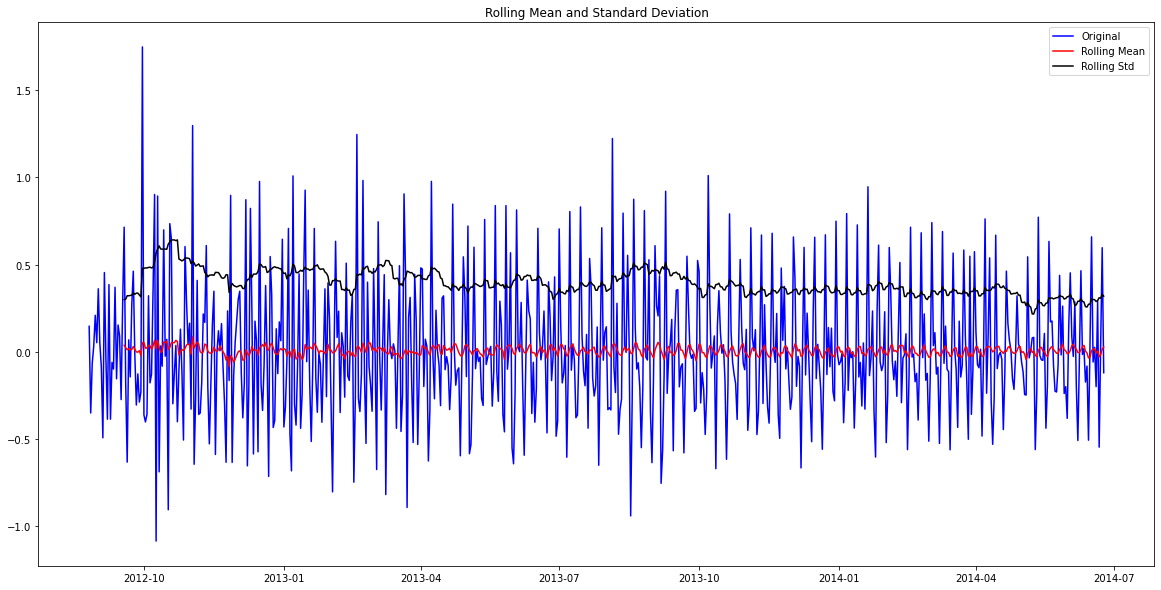

Results of Dickey-Fuller Test:
Test Statistic                -8.237568e+00
p value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


In [66]:
# Stabilizing the mean of the timeseries (a requirement for a stationary time series)
# Differencing can help to make the series stable and eliminate trend

train_log_diff = Train_log - Train_log.shift(1)
test_stationarity(train_log_diff.dropna())

**Decomposing the time series into trend and seasonality & get the residual which is the random variation in the series.**


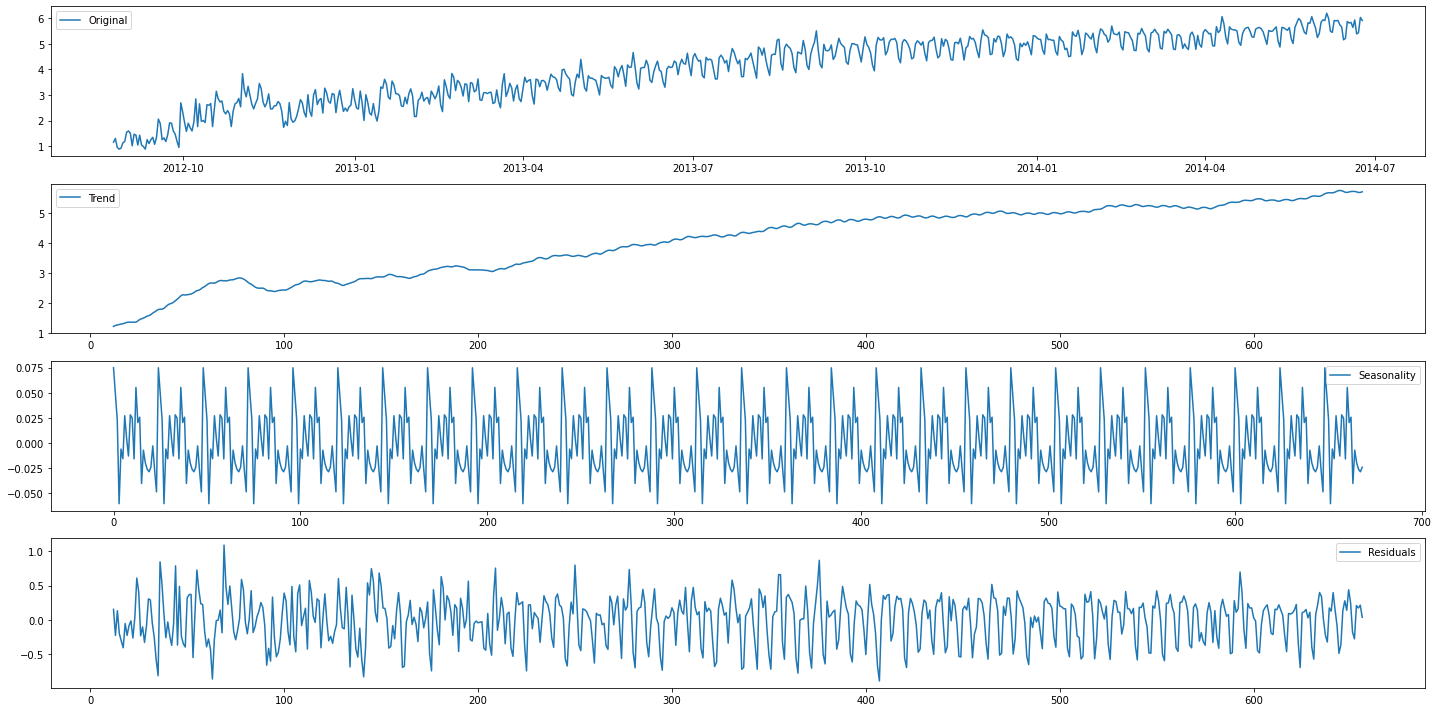

In [69]:
# Removing Seasonality
# Seasonality: periodic fluctuations.
# A seasonal pattern exists when a series is influenced by seasonal factors (e.g., the quarter of the year, the month or day of week)
# We use seasonal decompose to decompose the time series into trend, seasonilty and residuals.

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq=24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Train_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

**Observation**
* Seasonality shows a constant trend in counter.

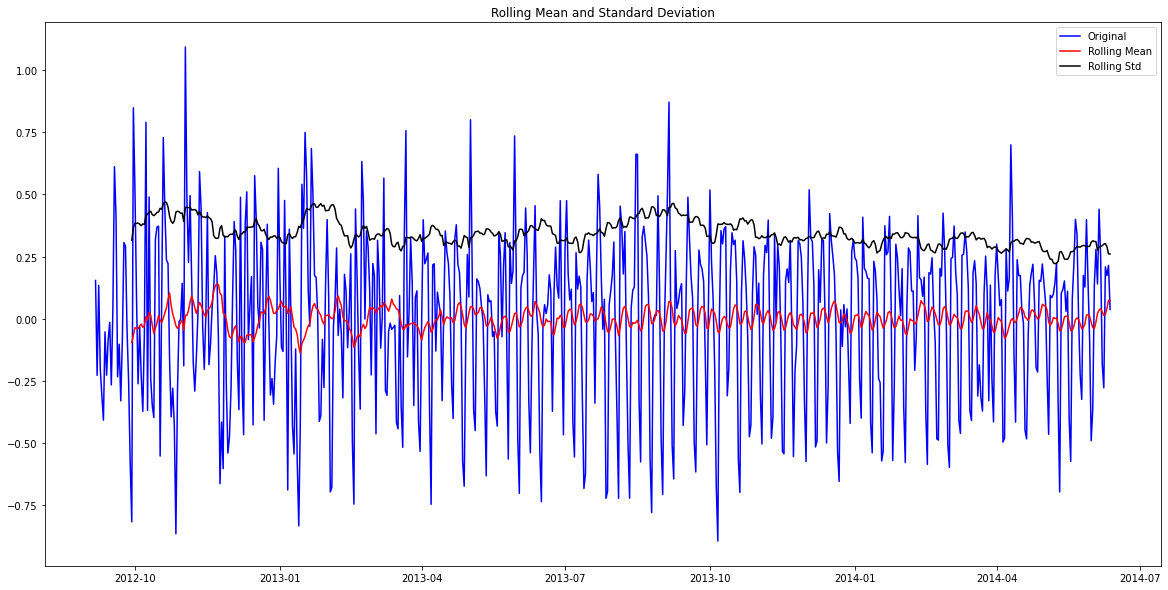

Results of Dickey-Fuller Test:
Test Statistic                -7.822096e+00
p value                        6.628321e-12
#Lags Used                     2.000000e+01
Number of Observations Used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (5%)           -2.866183e+00
Critical Value (10%)          -2.569243e+00
dtype: float64


In [70]:
# Checking for stationarity of residuals
train_log_decompose= pd.DataFrame(residual)
train_log_decompose['date'] = Train_log.index
train_log_decompose.set_index('date', inplace=True)
train_log_decompose.dropna(inplace=True)
test_stationarity(train_log_decompose[0])

**Observations**
* The residuals are stationary.

**We now forecast Time series using ARIMA.**
* 1st, we fit the ARIMA model on our time series & for that we have to find the optimized values for the p,d,q parameters.
* Auto Correlation Function (ACF) and Partial Autocorrelation Function (PACF) graphs are used to find the optimized values of these parameters.
* ACF: a measure of the correlation between the TimSeries with a lagged version of itself.
* PACF measures the correlation between the Timeseries with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons.

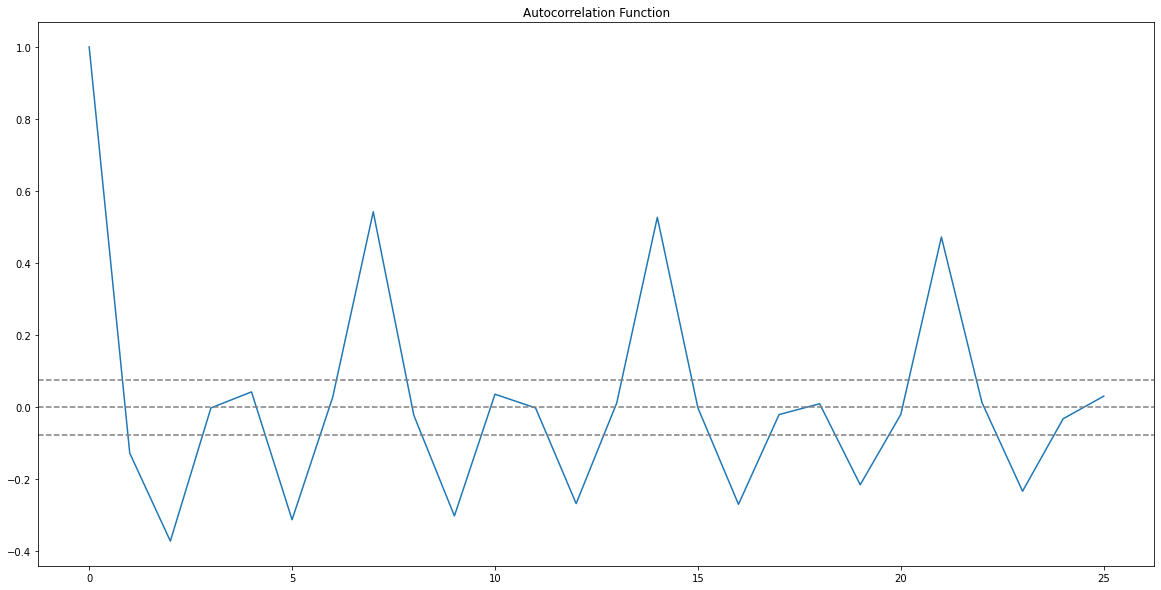

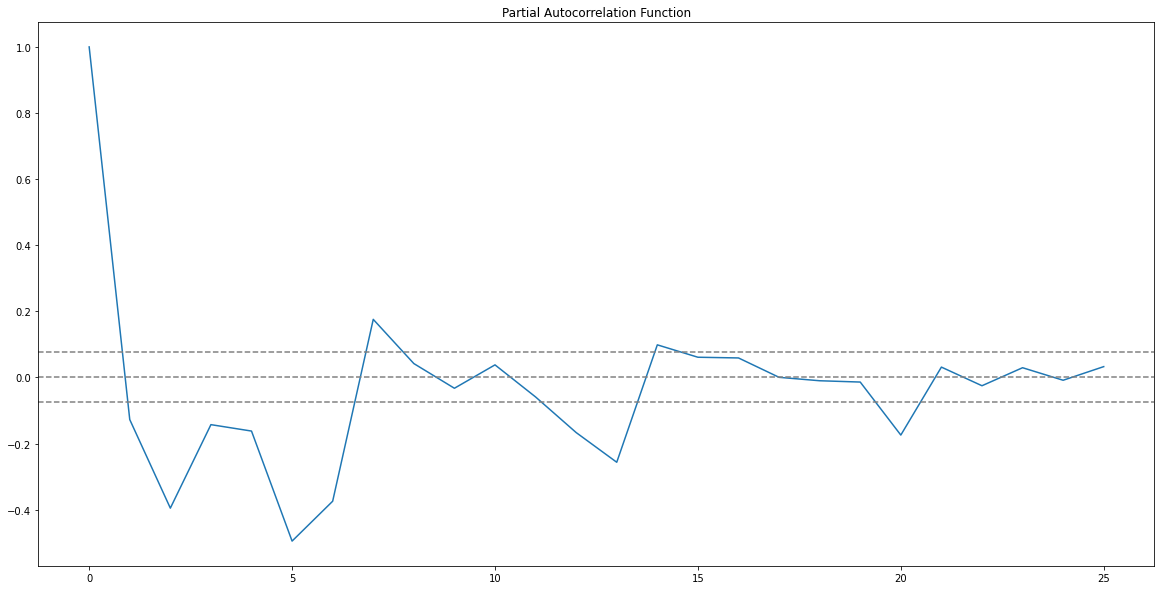

In [73]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(train_log_diff.dropna(), nlags=25)
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')

# ACF and PACF plot
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())), linestyle='--', color='gray') 
plt.title('Autocorrelation Function')
plt.show()
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()


**Observations**
* p value is the lag value where the PACF chart crosses the upper confidence interval for the first time. In this case, p=1.
* q value is the lag value where the ACF chart crosses the upper confidence interval for the first time. In this case, q=1.
* Given that we have the p,q values, we now make the AR and MA model separately then combine them together.


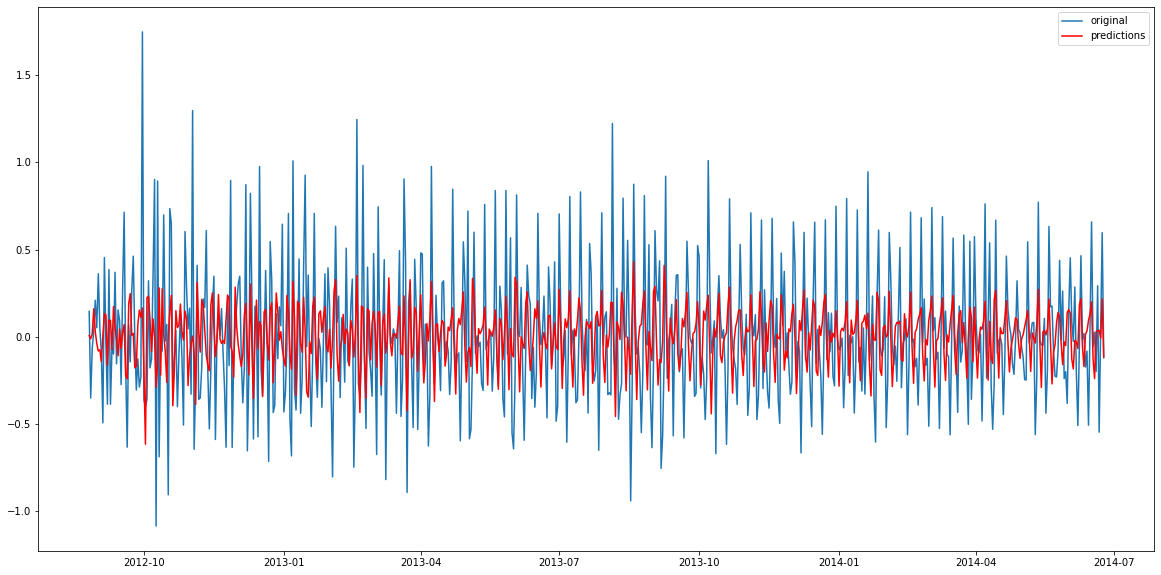

In [77]:
# AR Model
# Autoregressive model specifies that the output variable depends linearly on it's own previous values.
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Train_log, order=(2,1,0)) # q value is 0 since it's just the AR model
results_AR = model.fit(disp=-1)
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_AR.fittedvalues, color='red', label='predictions')
plt.legend(loc='best')
plt.show()

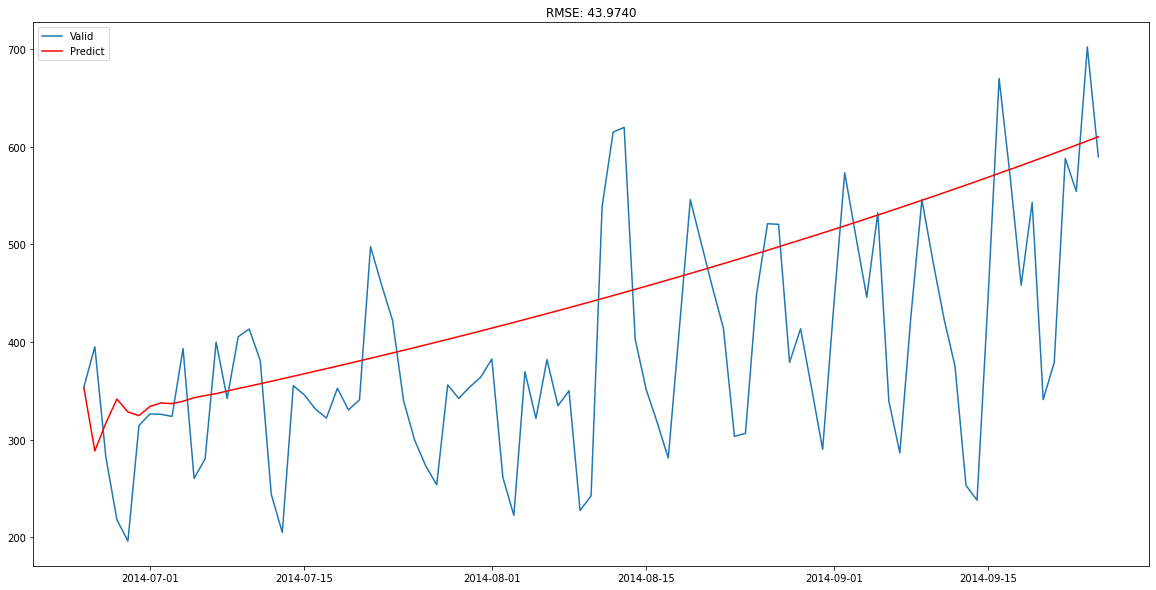

In [79]:
# Plotting the validation curve for AR model.
# We change the scale of the model to the original scale.
# We firststore the predicted results as a separate series and observe it.

AR_predict = results_AR.predict(start="2014-06-25", end="2014-09-25")
AR_predict = AR_predict.cumsum().shift().fillna(0)
AR_predict1 = pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index)
AR_predict1 = AR_predict1.add(AR_predict, fill_value=0)
AR_predict = np.exp(AR_predict1)
plt.plot(valid['Count'], label = "Valid")
plt.plot(AR_predict, color='red', label = "Predict")
plt.legend(loc='best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, valid['Count']))/valid.shape[0])) 
plt.show()

**Observation:**
* Red line shows the prediction for the validation set.

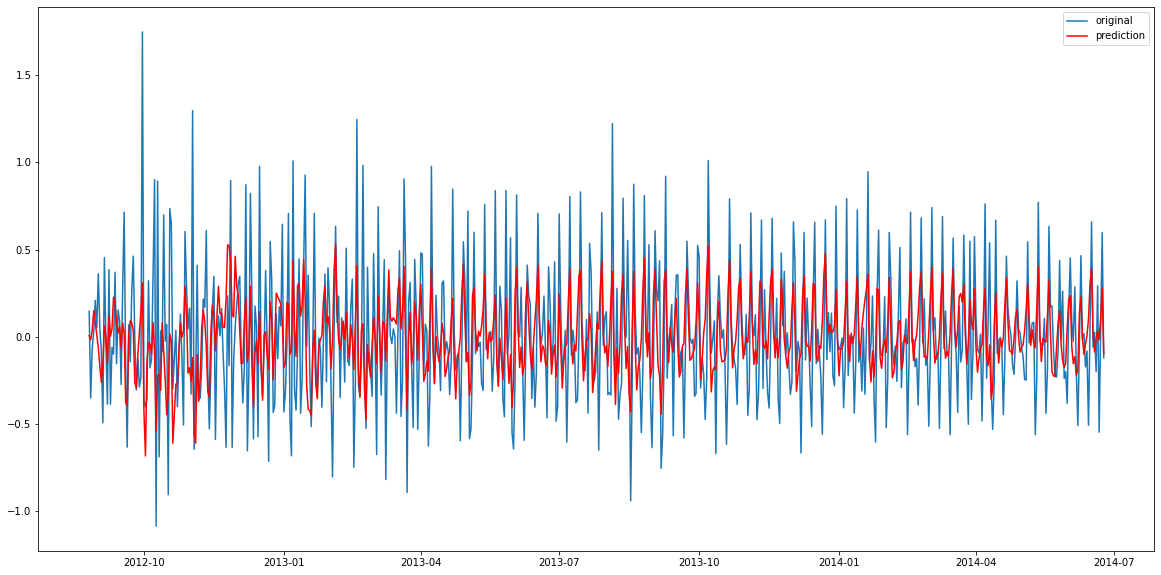

In [80]:
# MA model
# Moving average model specifies that the output variable depends linearly on the current and various post values of a stochastic (imperfectly predictable) term

model = ARIMA(Train_log, order=(0,1,2)) # p value is zero since it's just the MA model.
results_MA = model.fit(disp=-1)
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_MA.fittedvalues, color='red', label='prediction')
plt.legend(loc='best')
plt.show()

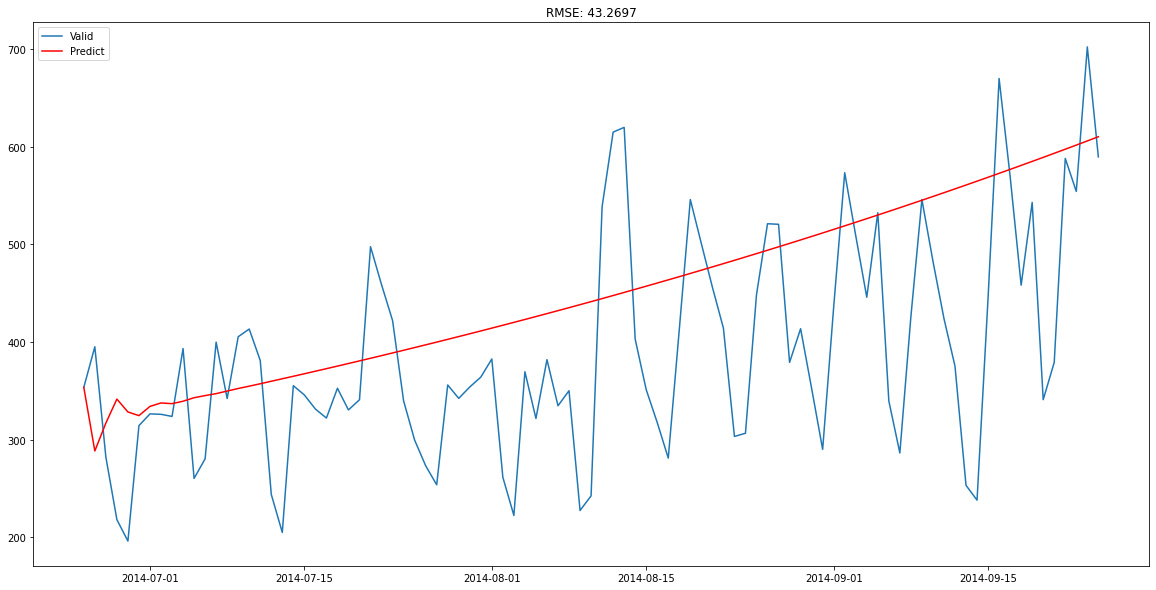

In [81]:
MA_predict = results_MA.predict(start="2014-06-25", end="2014-09-25")
MA_predict = MA_predict.cumsum().shift().fillna(0)
MA_predict1 = pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index)
MA_predict1 = MA_predict1.add(MA_predict, fill_value=0)
MA_predict = np.exp(MA_predict1)
plt.plot(valid['Count'], label = "Valid")
plt.plot(AR_predict, color='red', label = "Predict")
plt.legend(loc='best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, valid['Count']))/valid.shape[0])) 
plt.show()

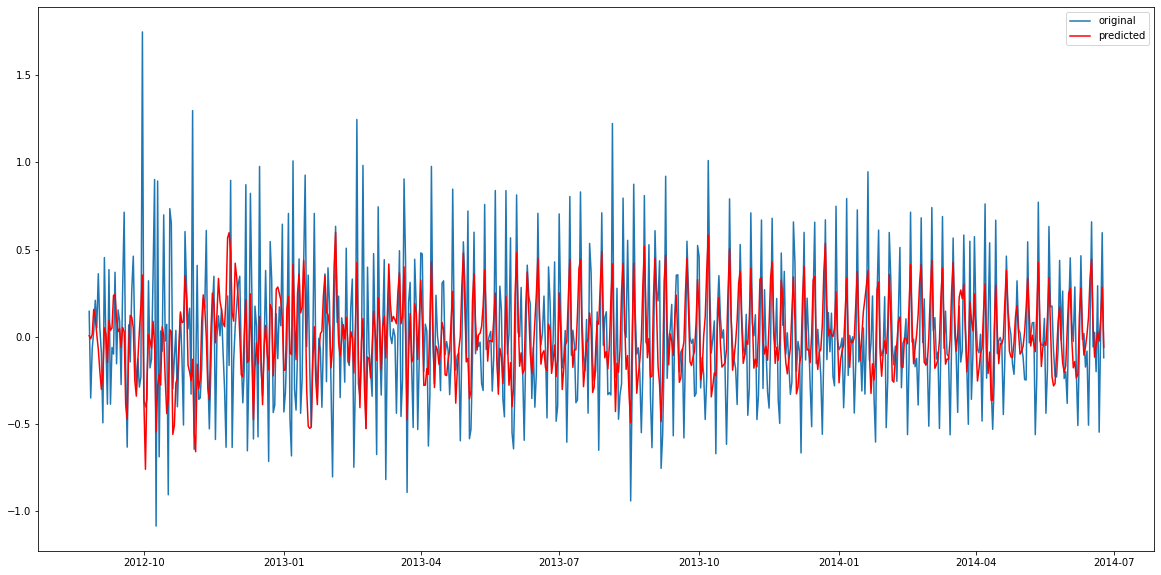

In [83]:
# Combining these 2 models
model = ARIMA(Train_log, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='predicted')
plt.legend(loc='best')
plt.show()

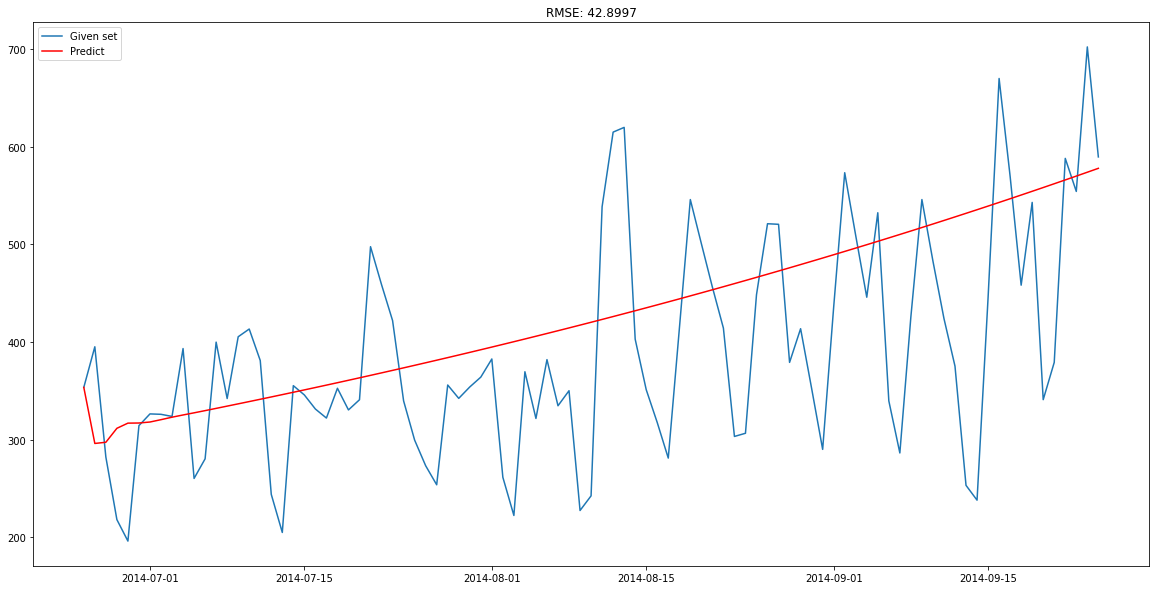

In [84]:
# Defining a function that can be used to change the scale of the model to the original scale
def check_prediction_diff(predict_diff, given_set):
  predict_diff = predict_diff.cumsum().shift().fillna(0)
  predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index = given_set.index)
  predict_log = predict_base.add(predict_diff, fill_value=0)
  predict = np.exp(predict_log)

  plt.plot(given_set['Count'], label = "Given set")
  plt.plot(predict, color = 'red', label = "Predict")
  plt.legend(loc='best')
  plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
  plt.show()

def check_prediction_log(predict_log, given_set):
  predict = np.exp(predict_log)
  plt.plot(given_set['Count'], label = "Given set")
  plt.plot(predict, color = 'red', label = "Predict")
  plt.legend(loc='best')
  plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
  plt.show()

# Predicting the value for validation
ARIMA_predict_diff = results_ARIMA.predict(start="2014-06-25", end="2014-09-25")
check_prediction_diff(ARIMA_predict_diff, valid)
  

**SARIMAX model on daily time series**

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


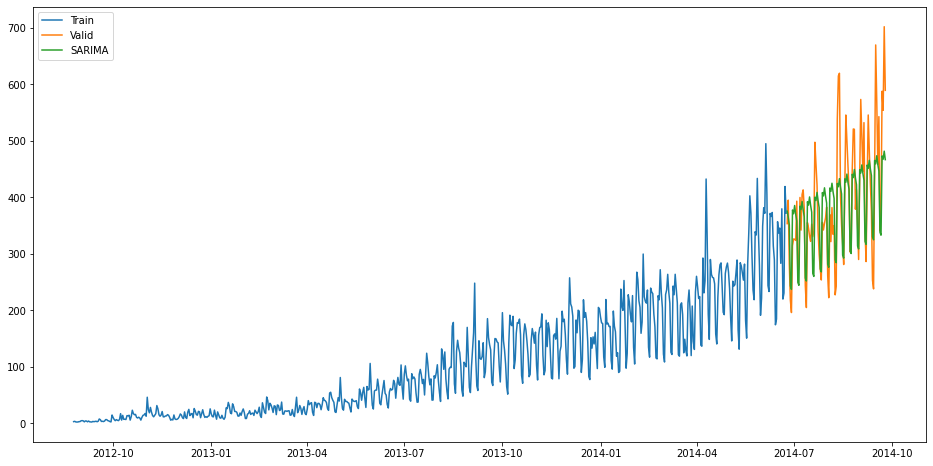

In [85]:
# SARIMAX model takes into account the seasonality of the time series

import statsmodels.api as sm
y_hat_avg = valid.copy()
fit1 = sm.tsa.statespace.SARIMAX(Train.Count, order=(2,1,4), seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2014-06-25", end="2014-09-25", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()


**Observations:**
* The order in the above model represents the order of the autoregressive model (no. of time lags), the degree of differencing (no. of times the data have had past values subtracted) & the order of moving average model.
* Seasonal order reps the order of the sesonal component of the model for the AR parameters, differences, MA parameters and periodocoty.
* The periodicity is 7 in this case since it's daily time series and will repeat after every 7 days.

In [86]:
# Checking the rmse value for the validation part
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SARIMA))
print(rms)

69.7096906968534


In [89]:
# Forecasting the time series for test data which starts from 2014-9-26 and ends on 2015-4-26
predict=fit1.predict(start="2014-9-26", end="2015-4-26", dynamic=True)

# - These are daily predictions & we need hourly predictions. 
# - We'll distribute this daily prediction into hourly counts.
# - We'll take the ratio of hourly distribution of passenger count from train data & then we distribute the predictions in the same ratio

test['prediction']=predict

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:1960: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


In [91]:
# Merging Test and test_original on day, month and year
merge=pd.merge(test, test_original, on=('day', 'month', 'year'), how='left')
merge['Hour']=merge['Hour_y']
merge=merge.drop(['year','month','Datetime','Hour_x','Hour_y'], axis=1)

# Predicting by merging merge and temp2
prediction = pd.merge(merge, temp2, on='Hour', how='left')

# Converting the ratio to the original scale
prediction['Count'] = prediction['prediction']*prediction['ratio']*24


In [92]:
# Dropping all variables other than ID and Count
prediction['ID']=prediction['ID_y']
submission=prediction.drop(['day','Hour','ratio', 'prediction','ID_x','ID_y'], axis=1)

In [ ]:
# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID', 'Count'].to_csv('SARIMAX.csv'))